In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import math
import hvplot.pandas
from MCForecastTools import MCSimulation

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Create empty disctionary of user's portfolio for analisys 
portfolio = {}

# Get portfolio tickers and shares from a user, defined period user analysis and fetch closing prices for a portfolio.
# Run Infinite loop "while True" to get as much stock tickers as user wishes to analysis and break when finished "Done". 
# Use input function for user interactions 
while True:
    
#The use of upper() in the provided code is to convert the user-inputted stock symbol to uppercase letters.
    stock = input("Enter a stock symbol (or 'done' to finish): ").upper() 
    if stock == 'DONE':
        break
    quantity = float(input(f"Enter the quantity of {stock}: "))
    portfolio[stock] = quantity

# Locate and convert the ".keys()" and ".values()" in dictionary to the list.
portfolio_tickers = list(portfolio.keys())
stock_shares = list(portfolio.values())

# Create empty disctionaty for historical_data to save all downloaded data.
# Run "for" loop to iterate through each stock ticker in the list and download closing data in defined period of time.
historical_data = {}
for stock_symbol in portfolio.keys():
    stock_data = yf.download(stock_symbol, period="5y")
    historical_data[stock_symbol] = stock_data['Close']


Enter a stock symbol (or 'done' to finish):  aapl
Enter the quantity of AAPL:  16
Enter a stock symbol (or 'done' to finish):  hd
Enter the quantity of HD:  7
Enter a stock symbol (or 'done' to finish):  unh
Enter the quantity of UNH:  5
Enter a stock symbol (or 'done' to finish):  cnq
Enter the quantity of CNQ:  36
Enter a stock symbol (or 'done' to finish):  xel
Enter the quantity of XEL:  21
Enter a stock symbol (or 'done' to finish):  vale
Enter the quantity of VALE:  140
Enter a stock symbol (or 'done' to finish):  sq
Enter the quantity of SQ:  34
Enter a stock symbol (or 'done' to finish):  axp
Enter the quantity of AXP:  11
Enter a stock symbol (or 'done' to finish):  uber
Enter the quantity of UBER:  38
Enter a stock symbol (or 'done' to finish):  amzn
Enter the quantity of AMZN:  15
Enter a stock symbol (or 'done' to finish):  done


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
def portfolio_value(portfolio_tickers, stock_shares):
    try:
        # Download historical stock prices
        data = yf.download(portfolio_tickers, period="1d")['Close']
        
        # Get the latest prices
        current_prices = data.iloc[-1]
        
        # Calculate the value of each stock
        stock_values = current_prices * pd.Series(portfolio)
        
        # Calculate the total portfolio value
        portfolio_value = stock_values.sum()
        
        return portfolio_value
    except Exception as e:
        print(f"Error fetching data: {e}")
        return None

# Calculate portfolio value
current_portfolio_value = portfolio_value(portfolio_tickers, stock_shares)

# Display the current portfolio value
print(f"\nCurrent Portfolio Value: ${current_portfolio_value:.2f}")

[*********************100%%**********************]  10 of 10 completed

Current Portfolio Value: $22880.92


[*********************100%%**********************]  10 of 10 completed


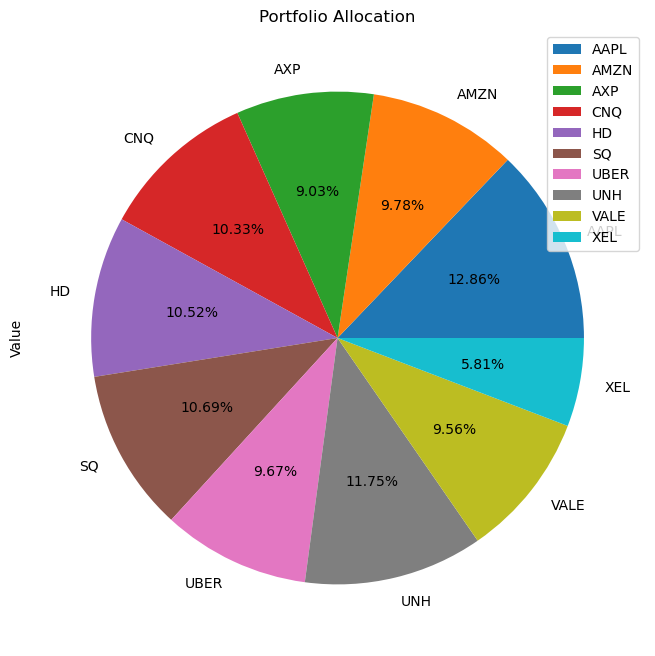

In [5]:
# Fetch stocks closing prices in the portfolio for period of one day .
data = yf.download(portfolio_tickers, period="1d")['Close'] 
current_prices = data.iloc[-1]

# Locate shares owned and calculate current values of each stock in the portfolio.
stock_shares = pd.Series(stock_shares, index=portfolio_tickers)
each_stock_value = pd.DataFrame((current_prices * stock_shares).round(2))

# Calculate percentage of each stock in the portfolio.
percentage_of_portfolio = ((each_stock_value / current_portfolio_value) * 100).round(2)

# Combine stocks values and percetage allocation in to one dataframe, define columns name and plot pie chart.
portfolio_summary = pd.concat([each_stock_value, percentage_of_portfolio], axis=1)
portfolio_summary.columns = ['Value', 'Percentage']
portfolio_summary.plot.pie(y='Value', 
                           autopct='%1.2f%%', 
                           title="Portfolio Allocation", 
                           figsize=(8, 8))
plt.legend(loc='upper right')

# Save plot in the images folder.
plt.savefig('images/portfolio_allocation.png')
portfolio_summary.to_csv('images/portfolio_summary.csv', index=False)

In [6]:
# Fetch the closing data for Sp 500, Define period you wish to work with.
sp500_data = yf.download('^GSPC',  period="5y") 
sp500_closing_prices = sp500_data['Close']

# Convert to pandas DataFrame, Rename cloumn name to SP500.
sp500_closing_prices = pd.DataFrame(sp500_closing_prices)
sp500_closing_prices.columns = ['SP500']

#  Calculate daily retuns of the Market and drop na.
sp500_returns = sp500_closing_prices.pct_change().dropna()

# Convert historical data of portfolio to pandas DataFrame and Calculate daily retuns of portfolio and drop na. 
historical_data = pd.DataFrame(historical_data)

portfolio_returns = historical_data.pct_change().dropna()

# Combine market and portfolio returns to one DataFrame.
combined_returns = pd.merge(sp500_returns, portfolio_returns, on='Date')
combined_returns

[*********************100%%**********************]  1 of 1 completed


,SP500,AAPL,HD,UNH,CNQ,XEL,VALE,SQ,AXP,UBER,AMZN
Date,,,,,,,,,,,
2019-05-13,-0.024131,-0.058119,-0.021791,-0.004323,-0.039901,0.009963,-0.039294,-0.054554,-0.021611,-0.107529,-0.035609
2019-05-14,0.008016,0.015830,0.006725,-0.013024,0.024641,-0.008134,0.005008,0.027569,0.009577,0.077089,0.009568
2019-05-15,0.005839,0.011979,0.000731,-0.001480,-0.002872,-0.001570,-0.003322,0.017470,0.005555,0.033283,0.016863
2019-05-16,0.008895,-0.004400,0.003233,0.003007,0.000720,0.008913,-0.040833,0.017937,0.018528,0.041414,0.019464
2019-05-17,-0.005837,-0.005682,0.001040,0.019384,-0.019425,0.008315,0.006950,-0.016416,-0.006425,-0.025349,-0.020219
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,0.004232,-0.002841,0.002065,-0.000538,0.035408,0.003062,0.012071,0.013482,0.002102,0.004375,-0.000065
2023-12-27,0.001430,0.000518,-0.002233,0.005307,-0.014804,-0.011406,0.005022,0.018163,0.005915,0.020974,-0.000456
2023-12-28,0.000370,0.002226,-0.003357,0.004036,-0.018182,0.005687,-0.007495,-0.001131,0.003956,-0.002212,0.000261


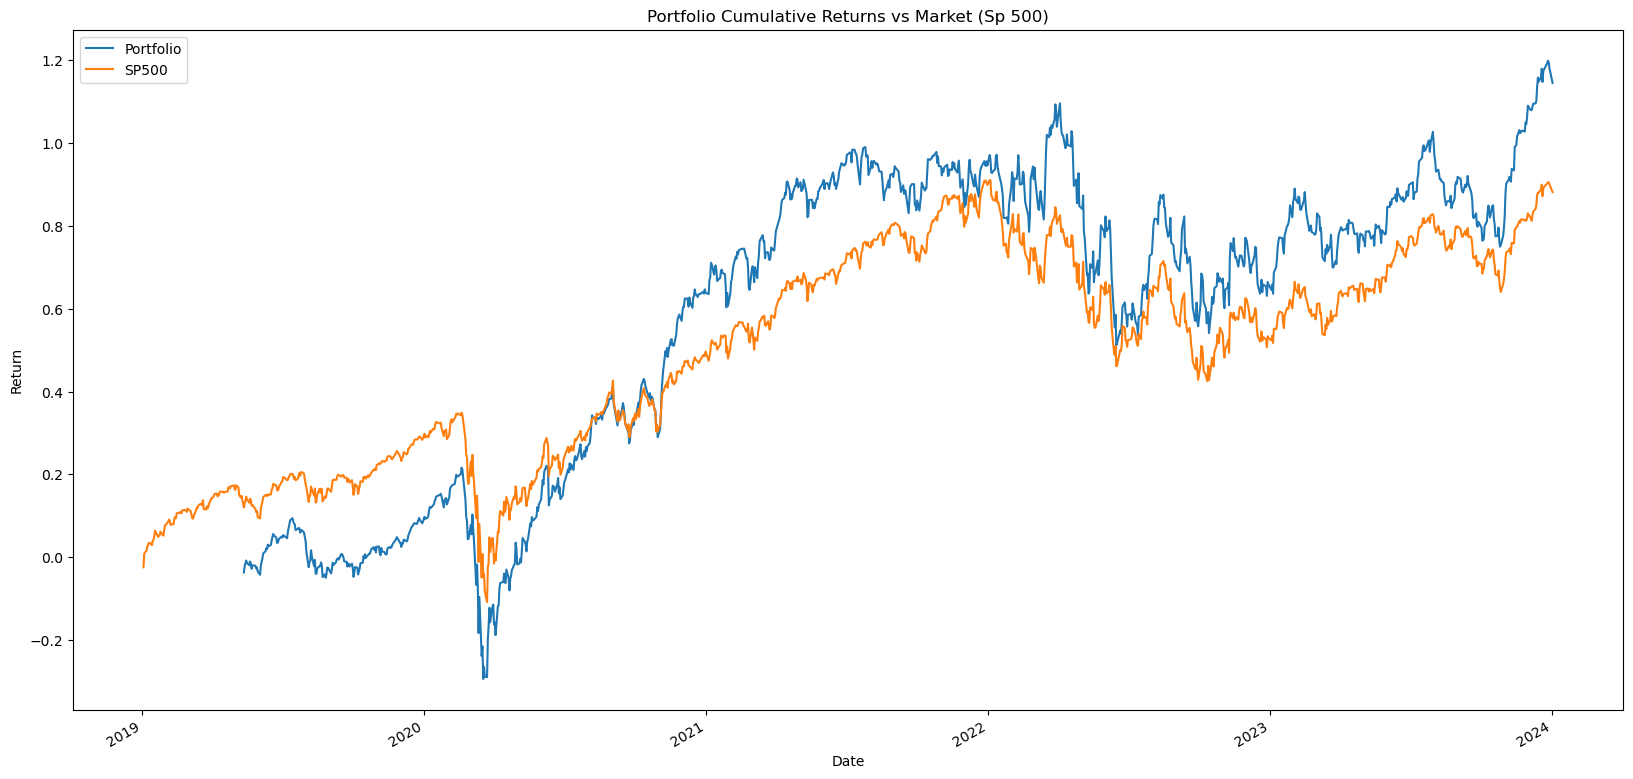

In [7]:
# Sum the average returns of the portfolio and calculate cumulative returns of the portfolio and then plot it.
portfolio_average_returns = portfolio_returns.mean(axis=1)
portfolio_cumulative_returns = (1 + portfolio_average_returns).cumprod() - 1
ax = portfolio_cumulative_returns.plot(figsize=(20,10), 
                        ylabel='Return',
                        title='Portfolio Cumulative Returns vs Market (Sp 500)',
                        label='Portfolio',
                        legend=True)
# Calculate cumulative returns of th market and plot it against our portfolio.
spy500_cumulative_returns = (1 + sp500_returns).cumprod() - 1
spy500_cumulative_returns.plot(ax=ax, label='SP500', legend=True)

# Save plot in the images folder.
plt.savefig('images/cumulative_returns.png')

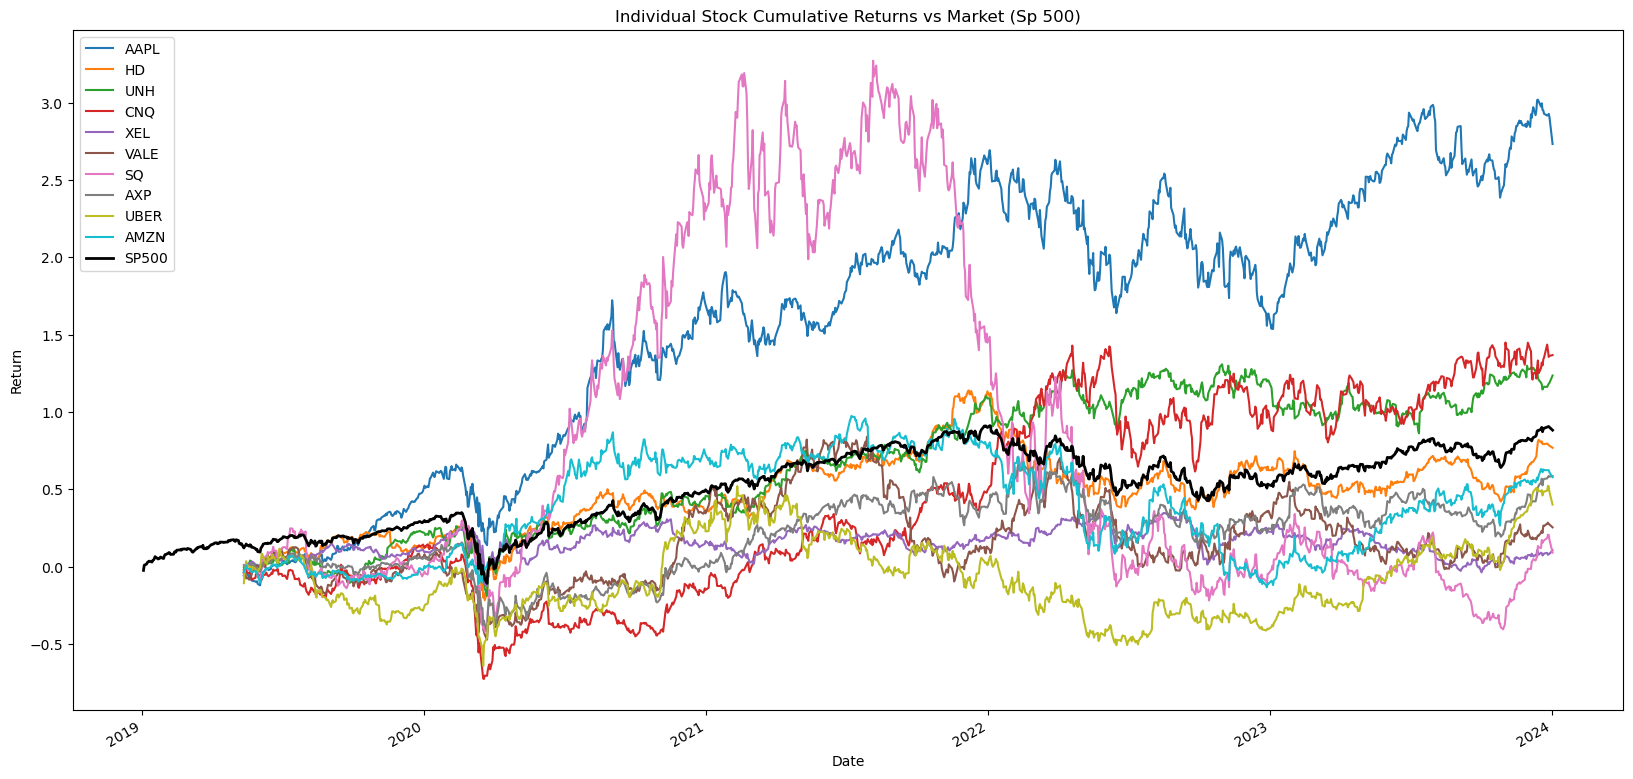

In [8]:
stock_cumulative_returns = (1 + portfolio_returns).cumprod() - 1
ax = stock_cumulative_returns.plot(figsize=(20,10), 
                        ylabel='Return',
                        title='Individual Stock Cumulative Returns vs Market (Sp 500)',
                        label='Portfolio',
                        legend=True)
spy500_cumulative_returns = (1 + sp500_returns).cumprod() - 1
spy500_cumulative_returns.plot(ax=ax, 
                               label='SP500', 
                               legend=True,
                               color='black', 
                               linewidth=2)
plt.savefig('images/individual_cumulative_returns.png')

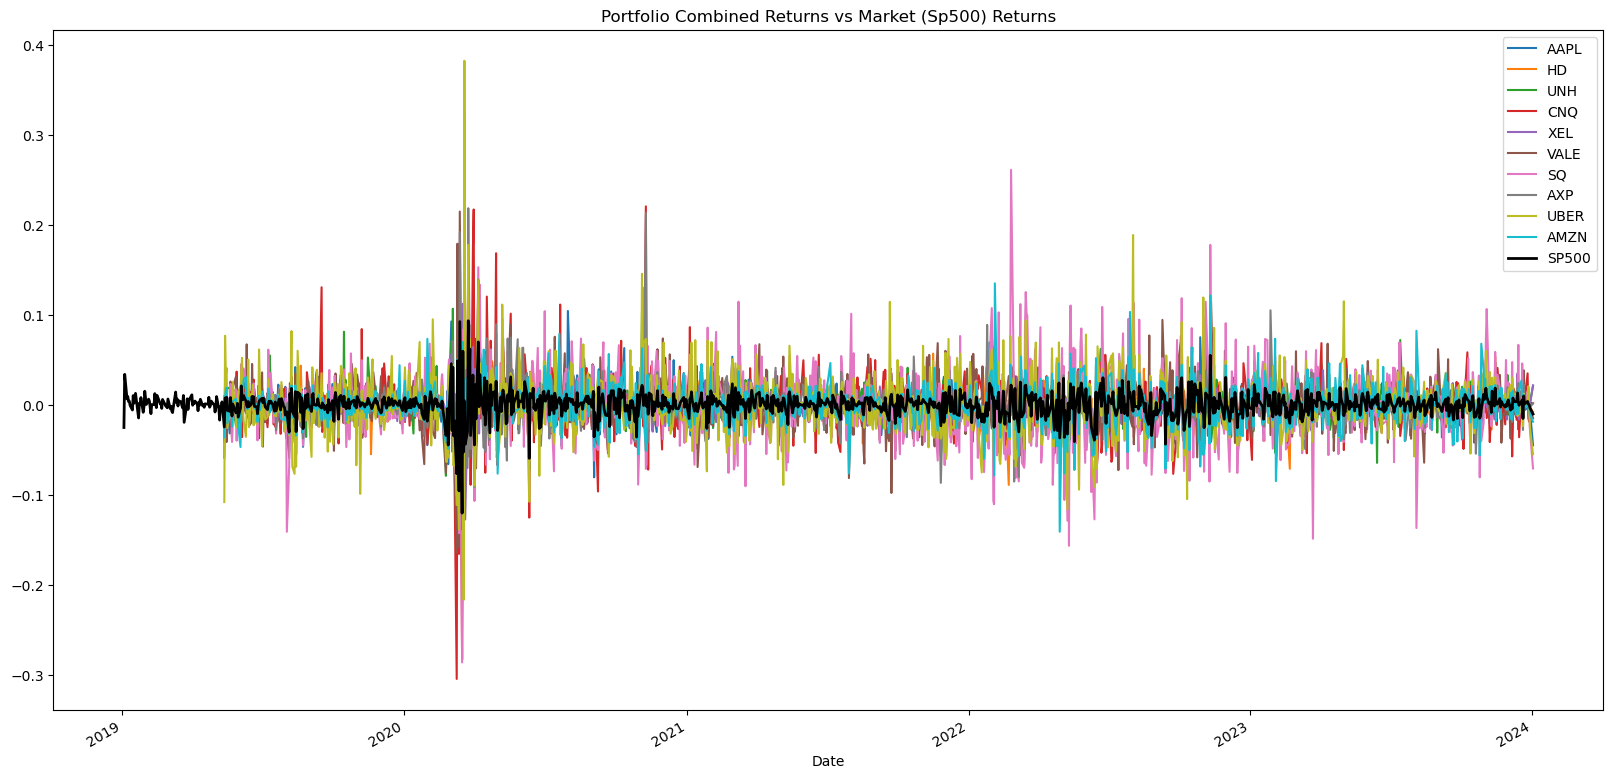

In [9]:
# Plot portfolio retuns and market retuns # Save plot in the images folder.

ax = portfolio_returns.plot(figsize=(20,10),
                       title='Portfolio Combined Returns vs Market (Sp500) Returns', 
                       legend=True)

sp500_returns.plot(ax=ax, label='SP500', 
                               legend=True,
                               color='black', 
                               linewidth=2) 

plt.savefig('images/combined_returns.png')

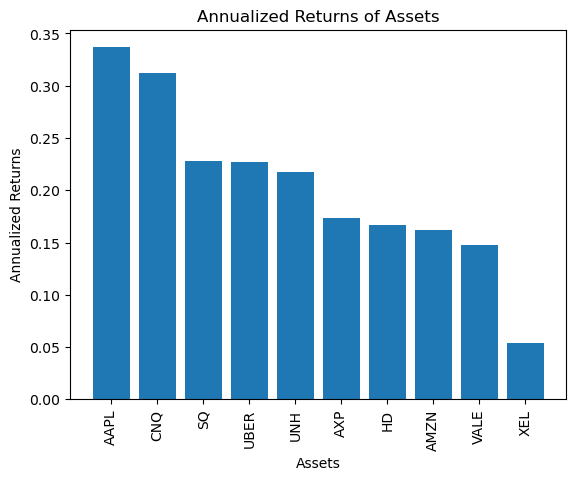

In [10]:
# define the risk free rate
risk_free_rate = 0.04/252 # annualized yield of 3-month Treasury bill divided by 252 trading days

# calculate the excess returns of each stock in the portfolio
excess_returns = portfolio_returns * stock_shares - risk_free_rate


# Calculate the annual returns
annual_daily_returns = portfolio_returns.mean() * 252
annual_excess_returns = excess_returns.mean() * 252

# Calculate the daily standard deviations
portfolio_returns_std = portfolio_returns.std()

# CAluculating the excess returns
excess_returns_std = excess_returns.std()


######### annual STD

# Calculate the annualized standard deviation (252 trading days)
stock_annualized_std = portfolio_returns_std * np.sqrt(252)
portfolio_annualized_std = excess_returns_std * np.sqrt(252)

# Calculate the stock risk
annual_stock_risk = portfolio_returns_std * math.sqrt(252)
annual_excess_risk = excess_returns_std * math.sqrt(252)

# Sorted the data in decending order
sorted_annual_returns = annual_daily_returns.sort_values(ascending=False)
sorted_annual_excess_returns = annual_excess_returns.sort_values(ascending=False)


# plot the sorted annualized returns of stock
plt.bar(sorted_annual_returns.index, sorted_annual_returns)
plt.ylabel("Annualized Returns")
plt.xlabel('Assets')

plt.xticks(rotation=90)
plt.title('Annualized Returns of Assets')
plt.savefig('images/annualized_returns.png')

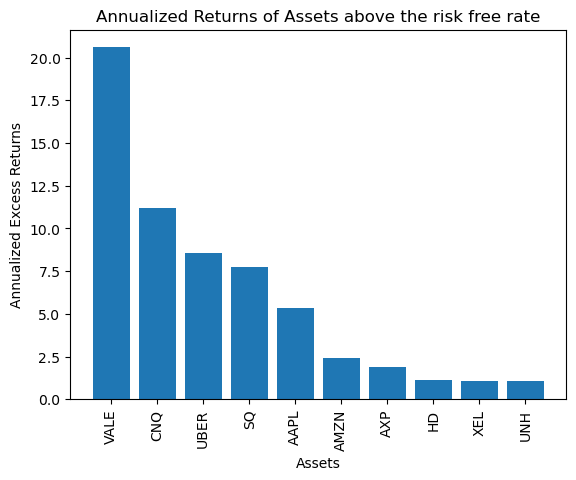

In [11]:
# Plot of the excess annual returns
# plot the sorted annualized returns of stock
plt.bar(sorted_annual_excess_returns.index, sorted_annual_excess_returns)
plt.ylabel("Annualized Excess Returns")
plt.xlabel('Assets')
plt.xticks(rotation=90)
plt.title('Annualized Returns of Assets above the risk free rate')
plt.show()

In [12]:
# creat a dataframe to store the annual returns, annual risks, annual excess returns and company ticker and new column for the ratio

risk_df = pd.DataFrame()
risk_df['Expected Annual Returns'] = annual_daily_returns
risk_df['Expected Annual Risk'] = annual_stock_risk
risk_df['Expected Annual Excess Returns'] = annual_excess_returns
risk_df['Stock'] = portfolio_tickers
risk_df['Ratio'] = risk_df['Expected Annual Returns'] / risk_df['Expected Annual Risk']

# show in decending order for the expected annual returns
risk_df.sort_values(by="Ratio", axis = 0, ascending=False, inplace=False)

,Expected Annual Returns,Expected Annual Risk,Expected Annual Excess Returns,Stock,Ratio
AAPL,0.336723,0.324692,5.347561,AAPL,1.037052
UNH,0.217314,0.296004,1.046569,UNH,0.734159
CNQ,0.312437,0.497251,11.207748,CNQ,0.628329
HD,0.166329,0.292603,1.124302,HD,0.568446
AMZN,0.162316,0.357760,2.394742,AMZN,0.453701
AXP,0.173931,0.389572,1.873236,AXP,0.446466
UBER,0.226777,0.561014,8.577543,UBER,0.404227
SQ,0.228320,0.646602,7.722890,SQ,0.353108
VALE,0.147397,0.445665,20.595548,VALE,0.330734
XEL,0.053726,0.252382,1.088252,XEL,0.212877


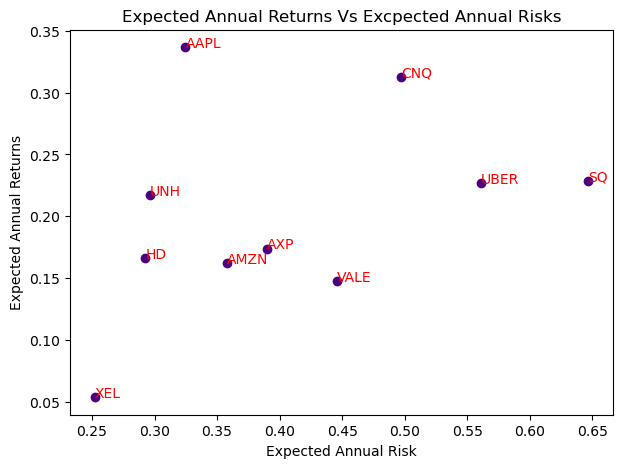

In [13]:
# visually show the ecpected annual returns vs the expected annual risk
risk_df.hvplot.bar()

fig, ax = plt.subplots(figsize=(7,5))
plt.title('Expected Annual Returns Vs Excpected Annual Risks')
ax.scatter(risk_df['Expected Annual Risk'], risk_df['Expected Annual Returns'], c = "indigo")
ax.set_xlabel('Expected Annual Risk')
ax.set_ylabel('Expected Annual Returns')
          
# note the points on plot
for idx, row in risk_df.iterrows():
    ax.annotate(row["Stock"], (row['Expected Annual Risk'], row['Expected Annual Returns']), c = 'red')
plt.savefig('images/portfolio_risk_return.png')

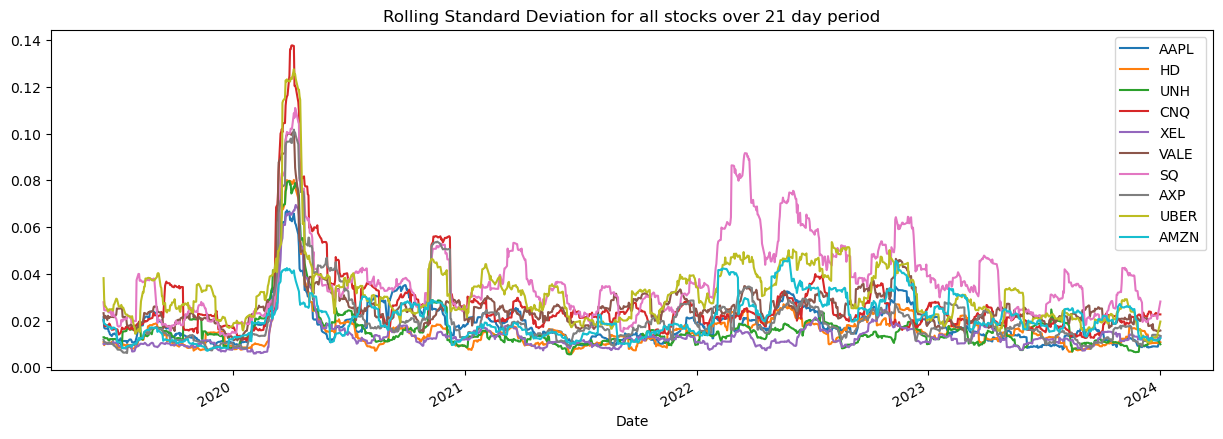

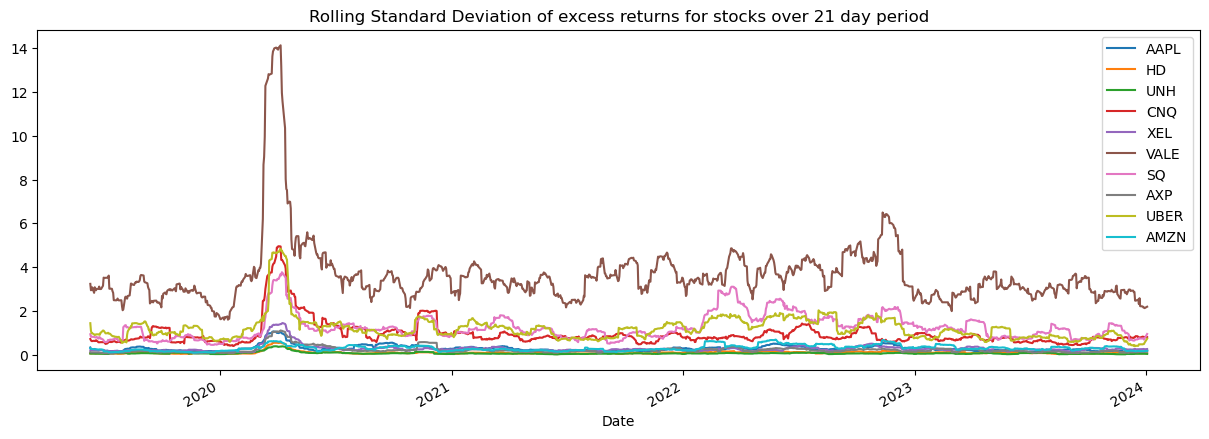

In [14]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = portfolio_returns.rolling(window=21).std()
excess_rolling_std = excess_returns.rolling(window=21).std()

# Plot the rolling standard deviation
rolling_std.plot(figsize=(15,5), title= 'Rolling Standard Deviation for all stocks over 21 day period')
plt.savefig('images/standard_deviation.png')
# Plotting excess
excess_rolling_std.plot(figsize=(15,5), title= 'Rolling Standard Deviation of excess returns for stocks over 21 day period')
plt.savefig('images/excess_return.png')



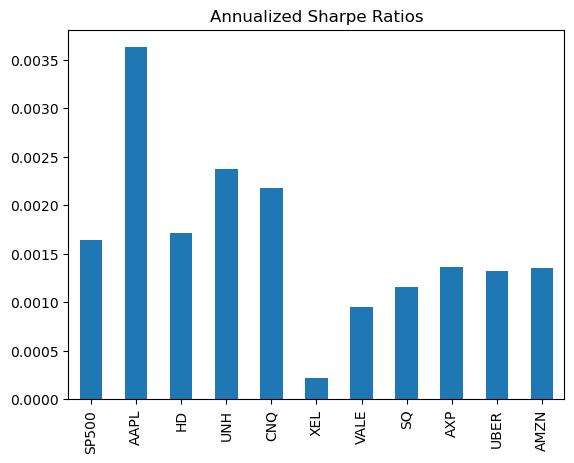

In [15]:
# Annualized Sharpe Ratios. Calculate sharpe ratio assuming risk free rate is 0
risk_free_rate
annualized_sharpe = ((combined_returns.mean() - risk_free_rate) / (combined_returns.std() * np.sqrt(252)))
# Visualize the sharpe ratios as a bar plot
annualized_sharpe.plot(kind='bar', 
                       title='Annualized Sharpe Ratios')
plt.savefig('gui_images/annualized_sharpe.png')

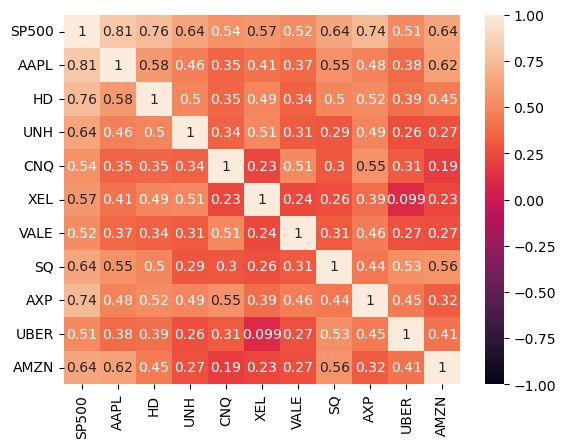

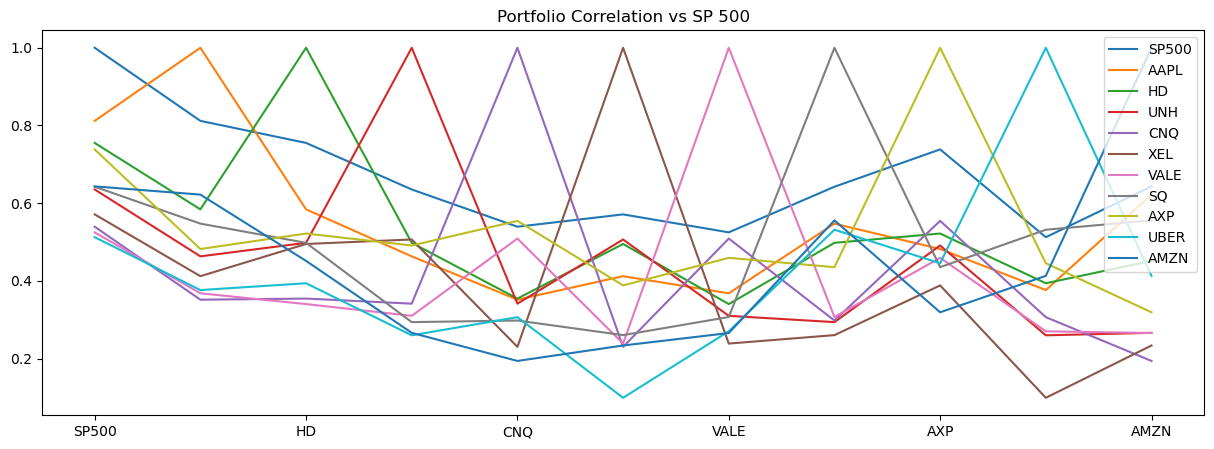

In [16]:
# Calculate the correlation
correlation_matrix = combined_returns.corr()
# Display de correlation matrix
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True)
plt.savefig('images/correlation_heatmap.png')

correlation_matrix.plot(figsize=(15,5), title='Portfolio Correlation vs SP 500')
plt.savefig('images/correlation_matrix.png')

In [17]:
# Calculate portflio weight
portfolio_weights = [(percentage / 100) for percentage in portfolio_summary['Percentage'].tolist()]

portfolio_tickers = list(portfolio.keys())
stock_shares = list(portfolio.values())

# Create empty disctionaty for portfolio data to save all downloaded data.
# Run "for" loop to iterate through each stock ticker in the list and 
# download all data in defined period of time.

portfolio_data = {}
for stock_symbol in portfolio.keys():
    stock_data = yf.download(stock_symbol, period="5y")
    portfolio_data[stock_symbol] = stock_data

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [18]:
# Concatenate portfolio data, concatenate along the columns and asign keys for each stock
portfolio_data_df = pd.concat(portfolio_data.values(),  axis=1, keys=portfolio_data.keys())

# Change column names to upper case for tickers and lower case for definition
portfolio_data_df.columns = portfolio_data_df.columns.map(lambda x: (x[0].upper(), x[1].lower()))


# Difine number of simulation
num_sims = 500

# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10years = MCSimulation(
    portfolio_data = portfolio_data_df,
    weights = portfolio_weights,
    num_simulation = num_sims,
    num_trading_days = 252*10
)
MC_10years.portfolio_data.dropna()

AAPL                                                  \
                  open        high         low       close   adj close   
Date                                                                     
2019-05-13   46.927502   47.369999   45.712502   46.430000   44.927494   
2019-05-14   46.602501   47.424999   46.352501   47.165001   45.638714   
2019-05-15   46.567501   47.937500   46.505001   47.730000   46.185421   
2019-05-16   47.477501   48.117500   47.209999   47.520000   45.982216   
2019-05-17   46.732498   47.724998   46.689999   47.250000   45.720963   
...                ...         ...         ...         ...         ...   
2023-12-26  193.610001  193.889999  192.830002  193.050003  193.050003   
2023-12-27  192.490005  193.500000  191.089996  193.149994  193.149994   
2023-12-28  194.139999  194.660004  193.169998  193.580002  193.580002   
2023-12-29  193.899994  194.399994  191.729996  192.529999  192.529999   
2024-01-02  187.149994  188.440002  183.884995  184.029099  184.029099   

                                            HD                          ...  \
               volume daily_return        open        high         low  ...   
Date                                                                    ...   
2019-05-13  229722400    -0.058119  191.000000  191.660004  189.139999  ...   
2019-05-14  146118800     0.015830  190.500000  192.759995  190.009995  ...   
2019-05-15  106178800     0.011979  190.809998  192.809998  190.270004  ...   
2019-05-16  132125600    -0.004400  192.470001  194.960007  192.199997  ...   
2019-05-17  131516400    -0.005682  190.860001  194.500000  190.750000  ...   
...               ...          ...         ...         ...         ...  ...   
2023-12-26   28919300    -0.002841  348.429993  350.089996  348.160004  ...   
2023-12-27   48087700     0.000518  349.910004  350.000000  347.179993  ...   
2023-12-28   34049900     0.002226  348.500000  349.040009  345.799988  ...   
2023-12-29   42628800    -0.005424  345.829987  347.549988  343.019989  ...   
2024-01-02   55310431    -0.044154  344.209991  347.301300  343.220001  ...   

                 UBER                                 AMZN              \
            adj close      volume daily_return        open        high   
Date                                                                     
2019-05-13  37.099998  79442400.0    -0.107529   91.828003   92.327003   
2019-05-14  39.959999  46661100.0     0.077089   91.974998   92.622002   
2019-05-15  41.290001  36086100.0     0.033283   91.397499   93.721497   
2019-05-16  43.000000  38115500.0     0.041414   94.296997   95.875504   
2019-05-17  41.910000  20225700.0    -0.025349   94.652496   95.526497   
...               ...         ...          ...         ...         ...   
2023-12-26  61.980000  16077200.0     0.004375  153.559998  153.979996   
2023-12-27  63.279999  20806000.0     0.020974  153.559998  154.779999   
2023-12-28  63.139999  13795600.0    -0.002212  153.720001  154.080002   
2023-12-29  61.570000  21602500.0    -0.024865  153.100006  153.889999   
2024-01-02  58.275002  28356483.0    -0.053516  151.539993  152.380005   

                                                                        
                   low       close   adj close     volume daily_return  
Date                                                                    
2019-05-13   90.900002   91.134003   91.134003  115668000    -0.035609  
2019-05-14   90.787498   92.005997   92.005997   92582000     0.009568  
2019-05-15   91.150002   93.557503   93.557503   93852000     0.016863  
2019-05-16   94.114502   95.378502   95.378502   94156000     0.019464  
2019-05-17   93.366501   93.449997   93.449997   94732000    -0.020219  
...                ...         ...         ...        ...          ...  
2023-12-26  153.029999  153.410004  153.410004   25067200    -0.000065  
2023-12-27  153.119995  153.339996  153.339996   31434700    -0.000456  
2023-12-28  152.949997  153.380005

In [19]:
# Run monte carlo simulation
MC_10years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.021557,0.996031,0.998553,0.995619,1.019518,1.002384,1.003391,1.012874,1.001179,0.988453,...,1.004204,1.018592,0.989736,0.999518,1.007710,1.025590,1.007815,0.999790,1.014530,0.996787
2,1.019636,1.001654,0.991487,0.996497,1.006091,0.992322,0.999811,1.007953,1.001601,0.974267,...,1.015856,1.020206,0.978589,0.989640,1.010559,1.030974,1.022782,1.000449,1.013326,0.995430
3,1.013110,0.990814,0.990361,0.989533,1.021736,0.996419,0.998436,1.005848,0.989107,0.984564,...,1.001611,1.023967,0.986366,0.986459,1.022941,1.038233,1.032023,1.008237,1.024793,0.984623
4,1.003650,0.993570,0.984788,0.986835,1.005201,1.010473,1.003497,1.010812,0.989397,0.988674,...,1.001831,1.010305,0.991236,0.987617,1.013428,1.052374,1.040972,1.014253,1.030054,0.985628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,6.117739,16.016840,9.107028,4.082647,6.640776,5.023055,7.604789,8.070152,3.152004,6.905322,...,7.057130,13.976182,5.943222,3.463389,7.841030,6.278060,7.928702,12.603489,24.294601,6.261059
2517,6.024073,15.806283,9.165753,4.121399,6.632947,5.060143,7.614402,8.108676,3.119660,7.025469,...,6.996959,13.973260,5.911816,3.459641,7.907130,6.352554,7.930106,12.605409,24.428744,6.193985
2518,6.110019,15.799847,9.043594,4.092442,6.736667,5.094674,7.654453,8.134218,3.121977,7.076124,...,6.948259,14.186402,5.957491,3.434902,7.967688,6.316197,7.848587,12.627892,24.204289,6.226435
2519,6.148623,15.848398,9.207236,4.099152,6.775059,5.139380,7.573997,8.080899,3.132705,7.143718,...,6.936238,14.303186,5.935718,3.452440,8.014679,6.323475,7.935599,12.471718,24.161533,6.170030


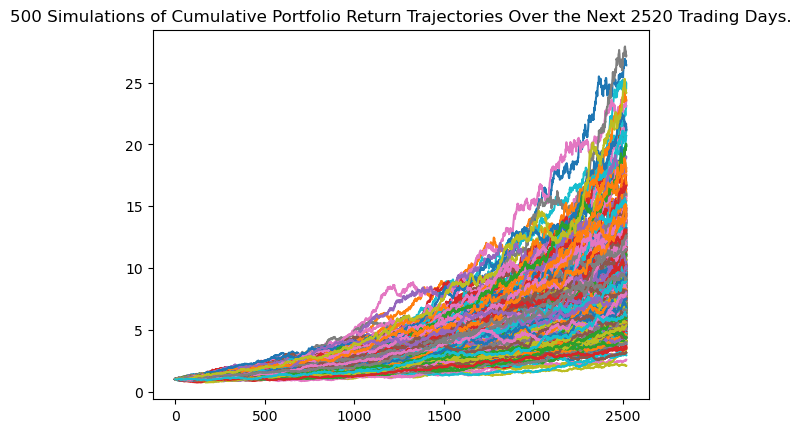

In [20]:
# Plot simulation outcomes 
line_plot = MC_10years.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("images/Monte_Carlo_10_year", bbox_inches="tight")

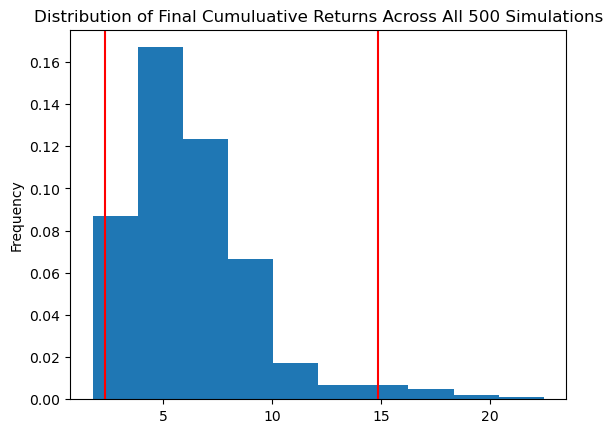

In [31]:
# Plot probability distribution and confidence intervals
distribution_plot = MC_10years.plot_distribution()


# Save the plot for future usage
distribution_plot.get_figure().savefig('images/Monte_Carlo_10year_dist_plot.png',bbox_inches='tight')

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_summary = MC_10years.summarize_cumulative_return()

# Print summary statistics
print(MC_summary)

count           500.000000
mean              8.901500
std               4.026341
min               2.103592
25%               6.091517
50%               8.002013
75%              10.682940
max              27.176880
95% CI Lower      3.742961
95% CI Upper     20.324130
Name: 2520, dtype: float64


In [22]:
# Set initial investment
initial_investment_10year = current_portfolio_value

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes.
ci_lower_ten = round(MC_summary[8] * initial_investment_10year,2)
ci_upper_ten = round(MC_summary[9] * initial_investment_10year,2)
ci_average_ten = round((ci_lower_ten + ci_upper_ten)/2,2)




# Calculate annual return and annual percetage return on average.
annual_lower_return_10 = ((ci_lower_ten - initial_investment_10year) / 10)
annual_lower_percent_10 = annual_lower_return_10 / initial_investment_10year


annual_upper_return_10 = ((ci_upper_ten - initial_investment_10year) / 10)
annual_upper_percent_10 = annual_upper_return_10 / initial_investment_10year





annual_average_return_10 = ((ci_average_ten - initial_investment_10year) / 10)
annual_average_percent_10 = annual_average_return_10 / initial_investment_10year

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_10year:.2f} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f"\n${ci_lower_ten} (Lower Annual Percent Change for 10 years: {annual_lower_percent_10 * 100:.2f}%) and" 
      f"\n${ci_upper_ten} (Upper Annual Percent Change for 10 years: {annual_upper_percent_10 * 100:.2f}%)."
      f"\nOn average {ci_average_ten} (Average Annual Percent Change for 10 years: {annual_average_percent_10 * 100:.2f}%)")



There is a 95% chance that an initial investment of $22880.92 in the portfolio over the next 10 years will end within in the range of
$85642.41 (Lower Annual Percent Change for 10 years: 27.43%) and
$465034.84 (Upper Annual Percent Change for 10 years: 193.24%).
On average 275338.62 (Average Annual Percent Change for 10 years: 110.34%)
